Βιβλιοθήκες & Συναρτήσεις
---

In [11]:
!pip install Node2Vec
import networkx as nx
import matplotlib.pyplot as plt
import node2vec
from node2vec import Node2Vec
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [12]:
def graph_plot(G,communities,colors):
    pos = nx.spring_layout(G,seed=7)
    plt.figure(figsize=(12,8))
    nx.draw_networkx_edges(G, pos=pos, width=3, edge_color='darkgray')
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G, pos=pos, nodelist=community, node_color=color, node_size=640)
    nx.draw_networkx_labels(G, pos=pos)
    _ = plt.axis('off')

In [13]:
def model_to_dataframe(model, graph):
  emb = (
      pd.DataFrame(
          [model.wv.get_vector(str(n)) for n in graph.nodes()],
        index = graph.nodes
      )
  )
  return emb

In [14]:
def list_counter(list):
  count_dict ={}
  for item in list:
    if item in count_dict:
      count_dict[item] +=1
    else:
      count_dict[item] = 1
  return count_dict

def purity(G, labels):
  "το labels είναι λίστα με λίστες που έχουν μόνο 0 ,1, 2"
  p = 0
  for com in labels:
    dictionary = list_counter(com)
    p += max(list(dictionary.values()))
  pure = p/len(G)
  return pure

Εισαγωγή του γράφου. Εξαγωγή και αποθήκευση χαρακτηριστηκών
---



In [15]:
G = nx.read_gml('/content/polbooks.gml',label='id',)
print('Number of nodes:',G.number_of_nodes(),'\nNumber of edges:',G.number_of_edges())

Number of nodes: 105 
Number of edges: 441


In [16]:
clustLib=[]
clustNeu=[]
clustCons=[]
for i in G.nodes:
  if (G.nodes[i]["value"])=="l":
    clustLib.append(i)
  elif (G.nodes[i]["value"])=="n":
    clustNeu.append(i)
  else:
    clustCons.append(i)
original_communities=[clustLib,clustNeu,clustCons]

In [17]:
for i in G.nodes:
  dictionary_communities = nx.get_node_attributes(G,'value')

In [18]:
replace_dict = {'n':0,'l':1,'c':2}
for key, value in dictionary_communities.items():
  if value in replace_dict:
    dictionary_communities[key]=replace_dict[value]

In [19]:
print('the orinal clusters modularity is:',np.round(nx.algorithms.community.modularity(G,original_communities),3))

the orinal clusters modularity is: 0.415


In [20]:
largest = max(nx.connected_components(G),key=len)

In [21]:
Gc = G.subgraph(largest)
print('Number of nodes:',Gc.number_of_nodes(),'\nNumber of edges:',Gc.number_of_edges())

Number of nodes: 105 
Number of edges: 441


Δημιουργία των  Node2Vec με
---
> (q=2, p=1)

> (q=0.5, p=1)

> (q=1, p=1)



In [22]:
#Node2Vec με q=2 και p=1
node2vec_1 = Node2Vec(Gc, dimensions=64,p=1,q=2)
#Node2Vec με q=0.5 και p=1
node2vec_2 = Node2Vec(Gc, dimensions=64,p=1,q=0.5)
#Node2Vec με q=1 και p=1
node2vec_3 = Node2Vec(Gc, dimensions=64,p=1,q=1)

Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 18.27it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 20.14it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 16.71it/s]



For node2vec_1




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the modularity is: 0.495
the purity is: 0.848


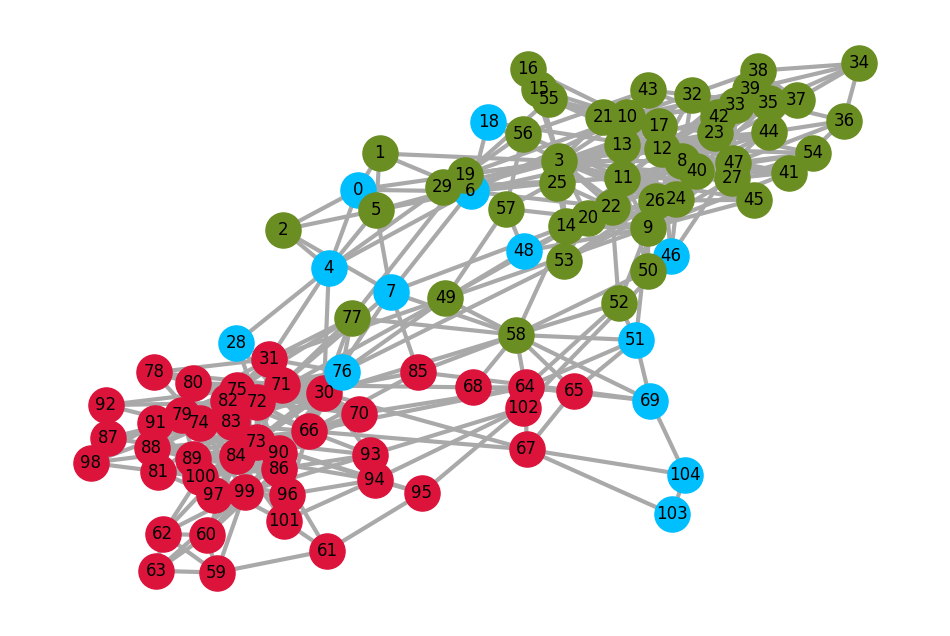

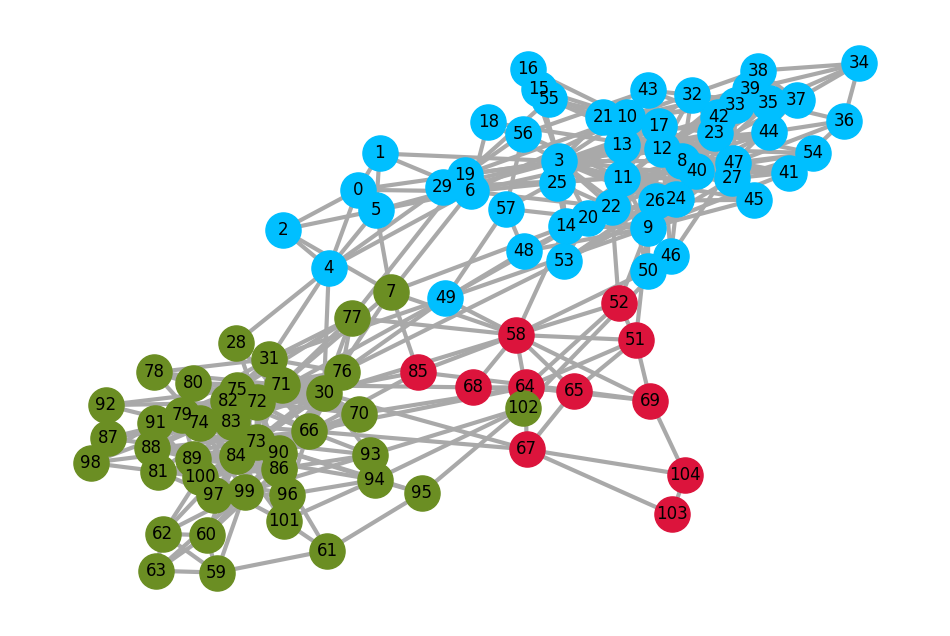

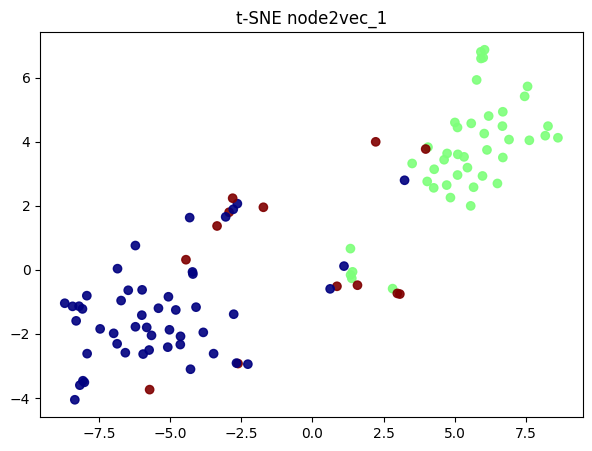

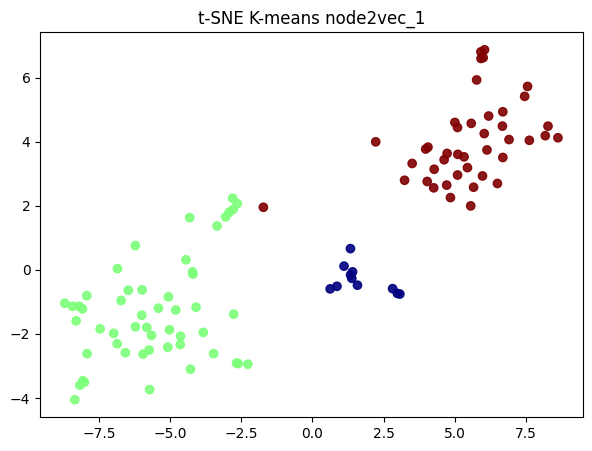


5 Nearest Neighors Classifierand node2vec_1 results:

Testing Accuracy :  0.9561278016213639
Training Accuracy :  0.9595561918396565
MCC Score :  0.0382091470676704
Test Confusion Matrix : 
[[   1    4]
 [  88 2004]]
Test Classification Report : 
               precision    recall  f1-score   support

   connection       0.20      0.01      0.02        89
no connection       0.96      1.00      0.98      2008

     accuracy                           0.96      2097
    macro avg       0.58      0.50      0.50      2097
 weighted avg       0.93      0.96      0.94      2097


Gaussian Naive Bayes Classifierand node2vec_1 results:

Testing Accuracy :  0.8068669527896996
Training Accuracy :  0.8144834168456215
MCC Score :  -0.003832071504693905
Test Confusion Matrix : 
[[  14  330]
 [  75 1678]]
Test Classification Report : 
               precision    recall  f1-score   support

   connection       0.04      0.16      0.06        89
no connection       0.96      0.84      0.89      2008


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the modularity is: 0.499
the purity is: 0.848


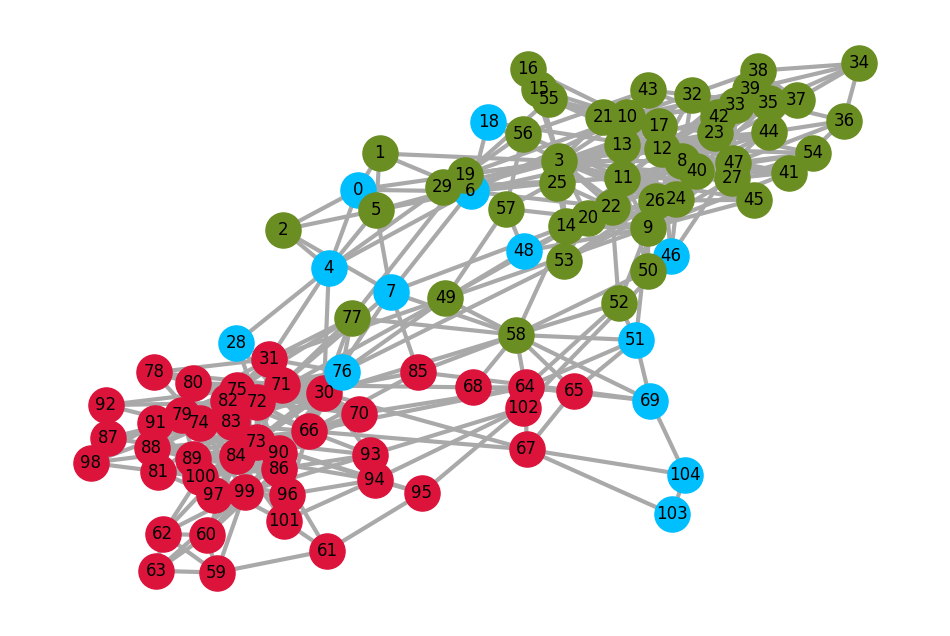

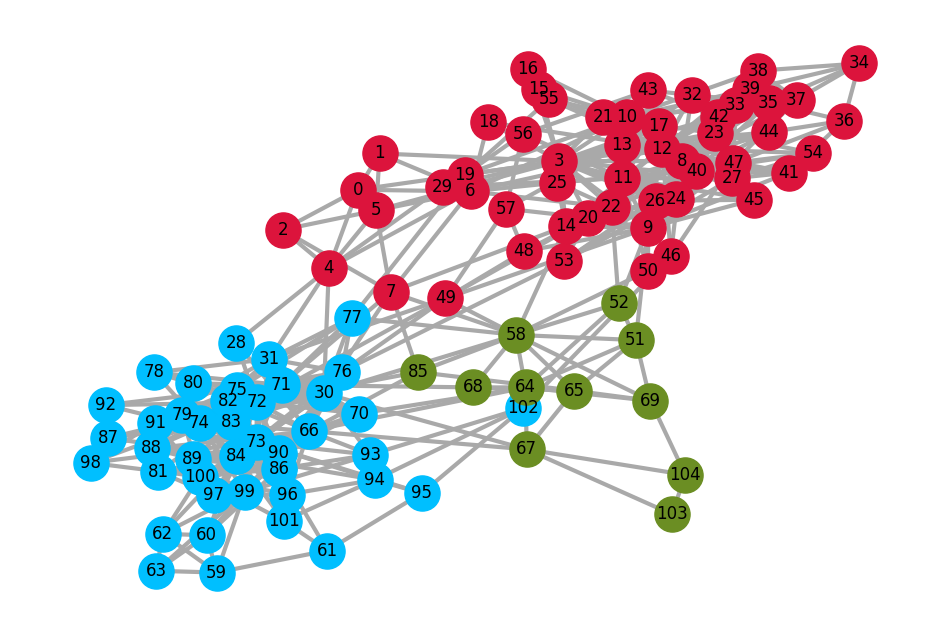

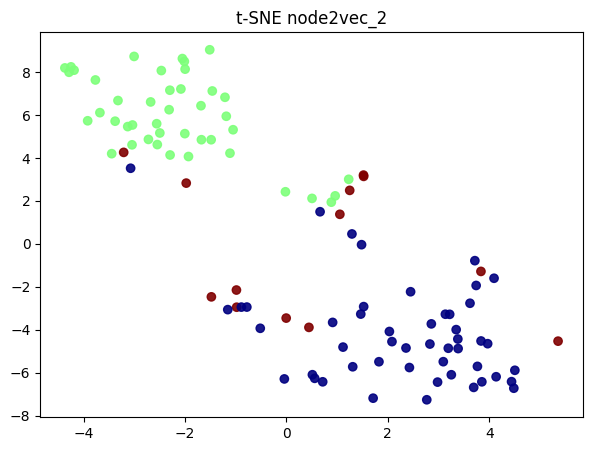

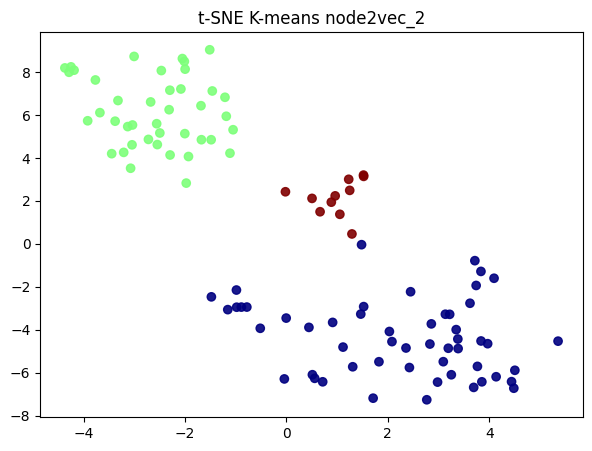


5 Nearest Neighors Classifierand node2vec_2 results:

Testing Accuracy :  0.9570815450643777
Training Accuracy :  0.958840372226199
MCC Score :  0.05461667611642753
Test Confusion Matrix : 
[[   1    2]
 [  88 2006]]
Test Classification Report : 
               precision    recall  f1-score   support

   connection       0.33      0.01      0.02        89
no connection       0.96      1.00      0.98      2008

     accuracy                           0.96      2097
    macro avg       0.65      0.51      0.50      2097
 weighted avg       0.93      0.96      0.94      2097


Gaussian Naive Bayes Classifierand node2vec_2 results:

Testing Accuracy :  0.8416785884597043
Training Accuracy :  0.8432355046528275
MCC Score :  0.036633827415005094
Test Confusion Matrix : 
[[  17  260]
 [  72 1748]]
Test Classification Report : 
               precision    recall  f1-score   support

   connection       0.06      0.19      0.09        89
no connection       0.96      0.87      0.91      2008



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the modularity is: 0.503
the purity is: 0.829


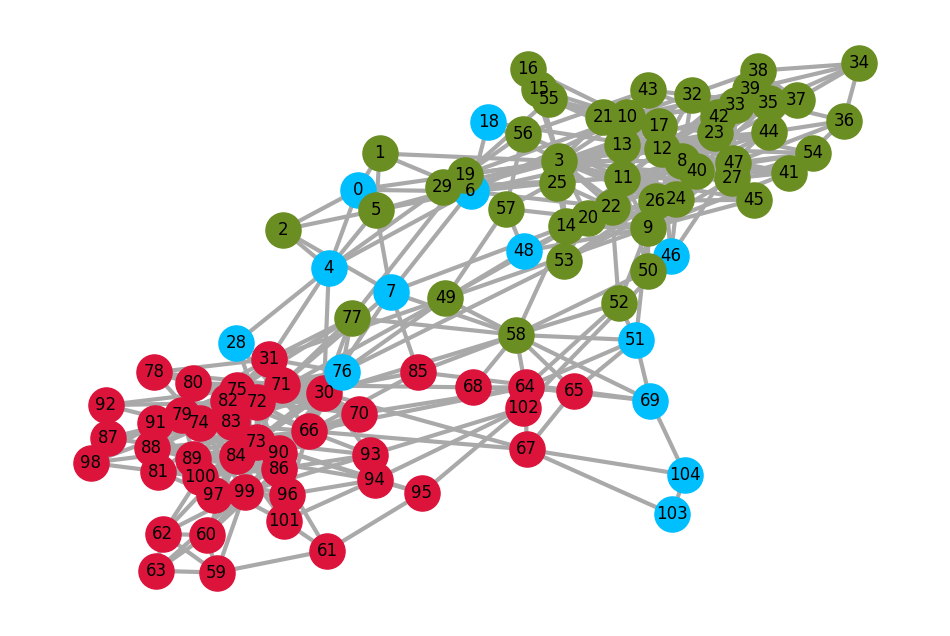

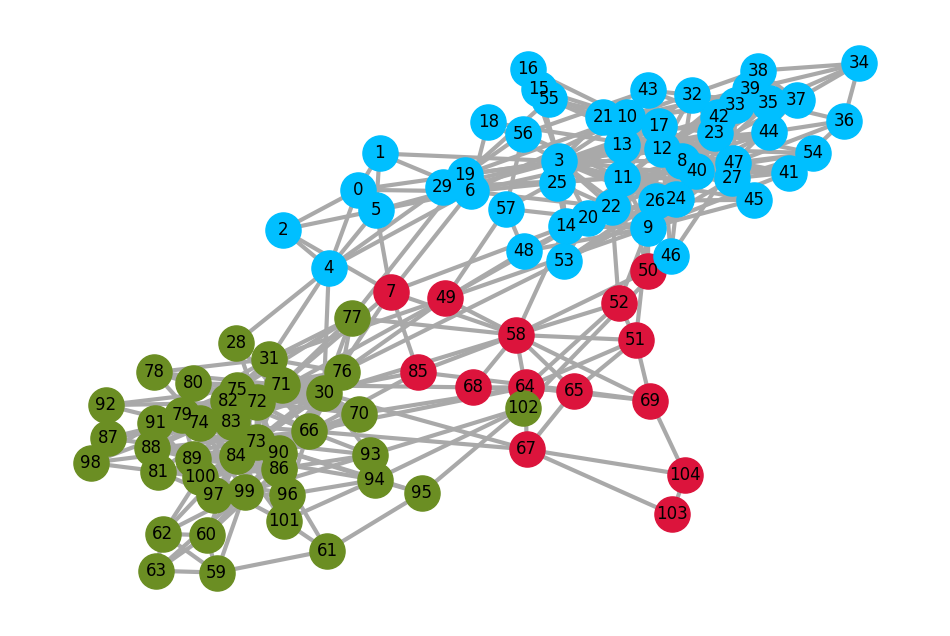

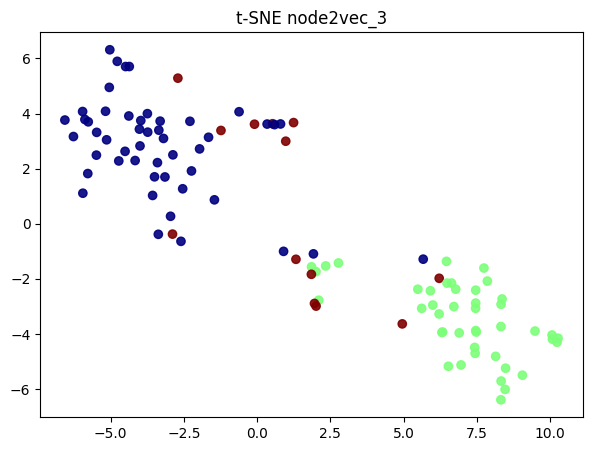

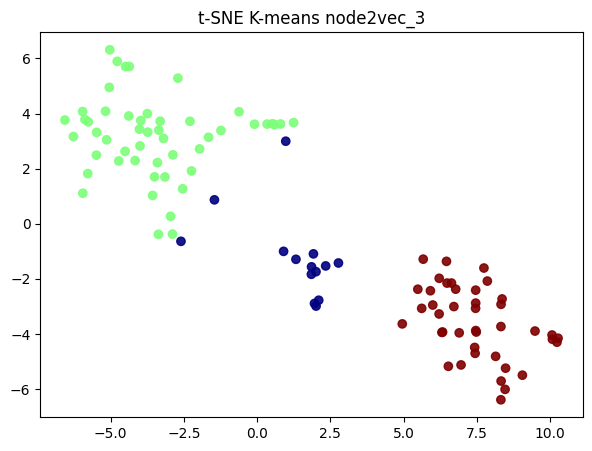


5 Nearest Neighors Classifierand node2vec_3 results:

Testing Accuracy :  0.9556509298998569
Training Accuracy :  0.9591982820329277
MCC Score :  -0.009203616851034862
Test Confusion Matrix : 
[[   0    4]
 [  89 2004]]
Test Classification Report : 
               precision    recall  f1-score   support

   connection       0.00      0.00      0.00        89
no connection       0.96      1.00      0.98      2008

     accuracy                           0.96      2097
    macro avg       0.48      0.50      0.49      2097
 weighted avg       0.92      0.96      0.94      2097


Gaussian Naive Bayes Classifierand node2vec_3 results:

Testing Accuracy :  0.9198855507868383
Training Accuracy :  0.918515867334765
MCC Score :  0.07416912370691453
Test Confusion Matrix : 
[[  11   90]
 [  78 1918]]
Test Classification Report : 
               precision    recall  f1-score   support

   connection       0.11      0.12      0.12        89
no connection       0.96      0.96      0.96      2008


In [23]:
node2vecs = [node2vec_1,node2vec_2,node2vec_3]
z=1
for n2v in node2vecs:

  print('\nFor node2vec_'+str(z)+'\n\n')
  model_1 = n2v.fit(window=10,min_count=1,batch_words=4)
  df_1 = model_to_dataframe(model_1, Gc)
  df_1.index.name = 'id'
  kmeans_1 = KMeans(n_clusters=3)
  kmeans_1.fit(df_1)
  labels_1 = kmeans_1.predict(df_1)
  #for every node the cluster_df_1 has its label/id and the predicted cluster
  df_1['cluster'] = labels_1
  clusters_df_1 = df_1.reset_index()[['id','cluster']]
  communities = [[],[],[]]
  for i in range(len(clusters_df_1['cluster'])):
    if clusters_df_1['cluster'][i]==0:
      communities[0].append(clusters_df_1['id'][i])
    if clusters_df_1['cluster'][i]==1:
      communities[1].append(clusters_df_1['id'][i])
    if clusters_df_1['cluster'][i]==2:
      communities[2].append(clusters_df_1['id'][i])

  colors=['crimson', 'deepskyblue', 'olivedrab']
  original_plot =graph_plot(Gc,original_communities,colors)
  predicted_plot = graph_plot(Gc, communities,colors)
  print('the modularity is:',round(nx.algorithms.community.modularity(Gc,communities),3))

  for community in communities:
    for i in range(len(community)):
      community[i] = dictionary_communities[community[i]]

  print('the purity is:',round(purity(Gc,communities),3))

  embedding = np.array(df_1.iloc[:,:-1].values.tolist())
  ids=df_1.index.tolist()
  node_targets = [G.nodes[int(node_id)]['value'] for node_id in ids]

  tsne = TSNE(n_components=2, learning_rate='auto',
                    init='random')
  node_2d_emb=tsne.fit_transform(embedding)
  label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
  node_colours = [ label_map[target] for target in node_targets]
  plt.figure(figsize=(7,5))
  plt.scatter(node_2d_emb[:,0],node_2d_emb[:,1],c=node_colours, cmap="jet", alpha=0.9)
  plt.title('t-SNE node2vec_'+str(z))
  plt.show()
  plt.figure(figsize=(7,5))
  plt.scatter(node_2d_emb[:,0],node_2d_emb[:,1],c=labels_1, cmap="jet", alpha=0.9)
  plt.title('t-SNE K-means node2vec_'+str(z))
  plt.show()

  #create training data
  embeddings = {node: model_1.wv[node] for node in G.nodes()}
  # Generate positive examples
  positive_edges = list(G.edges())

  # Generate negative examples
  negative_edges = []
  for node1 in G.nodes():
      for node2 in G.nodes():
          if node1 != node2 and not G.has_edge(node1, node2):
              negative_edges.append((node1, node2))

  # Split the data into training and testing sets
  positive_train, positive_test = train_test_split(positive_edges, test_size=0.2)
  negative_train, negative_test = train_test_split(negative_edges, test_size=0.2)

  # Create feature vectors for positive examples
  X_train_positive = [embeddings[node1] + embeddings[node2] for node1, node2 in positive_train]
  X_test_positive = [embeddings[node1] + embeddings[node2] for node1, node2 in positive_test]

  # Create feature vectors for negative examples
  X_train_negative = [embeddings[node1] + embeddings[node2] for node1, node2 in negative_train]
  X_test_negative = [embeddings[node1] + embeddings[node2] for node1, node2 in negative_test]

  # Combine positive and negative examples for training and testing
  x_train = X_train_positive + X_train_negative
  y_train = ['connection'] * len(X_train_positive) + ['no connection'] * len(X_train_negative)
  x_test = X_test_positive + X_test_negative
  y_test = ['connection'] * len(X_test_positive) + ['no connection'] * len(X_test_negative)

  classifier = [KNeighborsClassifier(n_neighbors=5),
              GaussianNB(), DecisionTreeClassifier()]
  clf_dict = {str(KNeighborsClassifier(n_neighbors=5)):'5 Nearest Neighors Classifier',
            str(GaussianNB()): 'Gaussian Naive Bayes Classifier',
            str(DecisionTreeClassifier()): 'Decision Tree Classifier'}

  for clf in classifier:
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_true = y_test

    y_pred = clf.predict(x_test)
    x_pred = clf.predict(x_train)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, x_pred)
    print('\n'+clf_dict[str(clf)]+'and node2vec_'+str(z)+' results:\n')
    print("Testing Accuracy : ", test_acc)
    print("Training Accuracy : ", train_acc)

    print("MCC Score : ", matthews_corrcoef(y_true, y_pred))

    print("Test Confusion Matrix : ")
    print(confusion_matrix(y_pred,y_test))

    print("Test Classification Report : ")
    print(classification_report(y_test, clf.predict(x_test), zero_division = 0))

  z+=1

In [24]:
# to see the propability of the connection 2-5
pred_ft = [(model_1.wv.get_vector(str('2'))+model_1.wv.get_vector(str('5')))]
print(clf.predict(pred_ft)[0])
print(clf.predict_proba(pred_ft))

no connection
[[0. 1.]]
